<a href="https://colab.research.google.com/github/bonniektran/FreeCodeCamp/blob/main/fcc_sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 60

Autosaving every 60 seconds


Neural Network SMS Text Classifier
You will be working on this project with Google Colaboratory.

After going to that link, create a copy of the notebook either in your own account or locally. Once you complete the project and it passes the test (included at that link), submit your project link below. If you are submitting a Google Colaboratory link, make sure to turn on link sharing for "anyone with the link."

We are still developing the interactive instructional content for the machine learning curriculum. For now, you can go through the video challenges in this certification. You may also have to seek out additional learning resources, similar to what you would do when working on a real-world project.

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called predict_message that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the SMS Spam Collection dataset. The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.

In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.9/590.9 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires ml-dtypes

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2024-06-02 04:09:16--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv.1’

train-data.tsv.1    100%[===================>] 349.84K  --.-KB/s    in 0.02s   

2024-06-02 04:09:16 (17.6 MB/s) - ‘train-data.tsv.1’ saved [358233/358233]

--2024-06-02 04:09:16--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv.1’

valid-data.tsv.1    100%[========

In [ ]:
train = pd.read_table(train_file_path, header=None, names=['type', 'message'])
test = pd.read_table(test_file_path, header=None, names=['type', 'message'])

In [ ]:
print('train:\n', train.head())
print('\ntest:\n', test.head())

train:
   type                                            message
0  ham  ahhhh...just woken up!had a bad dream about u ...
1  ham                           you can never do nothing
2  ham  now u sound like manky scouse boy steve,like! ...
3  ham  mum say we wan to go then go... then she can s...
4  ham  never y lei... i v lazy... got wat? dat day ü ...

test:
   type                                            message
0  ham  i am in hospital da. . i will return home in e...
1  ham         not much, just some textin'. how bout you?
2  ham  i probably won't eat at all today. i think i'm...
3  ham  don‘t give a flying monkeys wot they think and...
4  ham                                who are you seeing?


In [ ]:
print('train:', train.shape)
print('test:', test.shape)

train: (4179, 2)
test: (1392, 2)


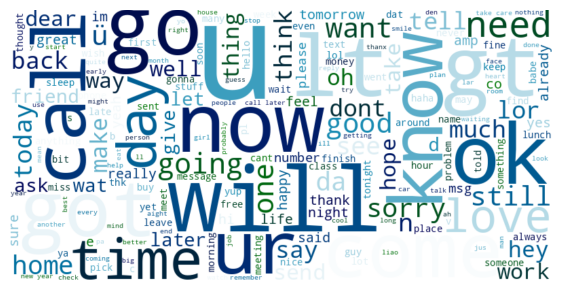

In [ ]:
# wordcloud to visualize the most frequent words from 'ham' messages

ham_text = ' '.join([text for text in train['message'][train['type']=='ham']])

# most common words in tweets using wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=1, background_color='white',
                      colormap='ocean_r', max_font_size=200).generate(ham_text)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

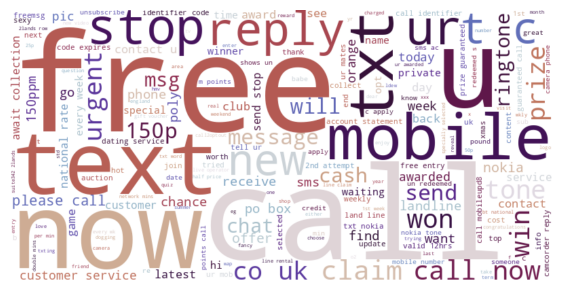

In [ ]:
# wordcloud to visualize the most frequent words from 'spam' messages

spam_text = ' '.join([text for text in train['message'][train['type']=='spam']])

# most common words in tweets using wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=1, background_color='white',
                      colormap='twilight_shifted_r', max_font_size=200).generate(spam_text)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# tokenization (note: cannot use word_tokenize() since #word counts as two words instead of one)
tokenized_tweet = train['message'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [ahhhh...just, woken, up!had, a, bad, dream, a...
1                       [you, can, never, do, nothing]
2    [now, u, sound, like, manky, scouse, boy, stev...
3    [mum, say, we, wan, to, go, then, go..., then,...
4    [never, y, lei..., i, v, lazy..., got, wat?, d...
Name: message, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# lemmatization (i.e., keep base/root word only)
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemma.lemmatize(i) for i in x]) # lemmatization
tokenized_tweet.head()

0    [ahhhh...just, woken, up!had, a, bad, dream, a...
1                       [you, can, never, do, nothing]
2    [now, u, sound, like, manky, scouse, boy, stev...
3    [mum, say, we, wan, to, go, then, go..., then,...
4    [never, y, lei..., i, v, lazy..., got, wat?, d...
Name: message, dtype: object

In [ ]:
# print out tokenized tweets corresponding to ham messages
ham_token = tokenized_tweet[train['type']=='ham']
ham_token

0       [ahhhh...just, woken, up!had, a, bad, dream, a...
1                          [you, can, never, do, nothing]
2       [now, u, sound, like, manky, scouse, boy, stev...
3       [mum, say, we, wan, to, go, then, go..., then,...
4       [never, y, lei..., i, v, lazy..., got, wat?, d...
                              ...                        
4172    [not, yet, chikku..going, to, room, nw,, i'm, ...
4173    [tell, you, what,, if, you, make, a, little, s...
4174    [just, woke, up., yeesh, it, late., but, i, di...
4175    [what, do, u, reckon, a, need, 2, arrange, tra...
4178    [tell, my, bad, character, which, u, dnt, lik,...
Name: message, Length: 3619, dtype: object

In [ ]:
# print out tokenized tweets corresponding to spam messages
spam_token = tokenized_tweet[train['type']=='spam']
spam_token

8       [urgent!, call, 09066350750, from, your, landl...
16      [bored, housewives!, chat, n, date, now!, 0871...
20      [message, important, information, for, o2, use...
37      [free, for, 1st, week!, no1, nokia, tone, 4, u...
39      [you, have, 1, new, voicemail., please, call, ...
                              ...                        
4164    [free, msg:, single?, find, a, partner, in, yo...
4165    [free2day, sexy, st, george's, day, pic, of, j...
4167    [you, are, a, winner, you, have, been, special...
4176    [free, entry, into, our, £250, weekly, competi...
4177    [-pls, stop, bootydelious, (32/f), is, invitin...
Name: message, Length: 560, dtype: object

In [ ]:
# unnest strings (combine all the list into one long one)
ham_token = sum(ham_token,[])
spam_token = sum(spam_token,[])

In [ ]:
# list for ham strings
ham_token

['ahhhh...just',
 'woken',
 'up!had',
 'a',
 'bad',
 'dream',
 'about',
 'u',
 'tho,so',
 'i',
 'dont',
 'like',
 'u',
 'right',
 'now',
 ':)',
 'i',
 'didnt',
 'know',
 'anything',
 'about',
 'comedy',
 'night',
 'but',
 'i',
 'guess',
 'im',
 'up',
 'for',
 'it.',
 'you',
 'can',
 'never',
 'do',
 'nothing',
 'now',
 'u',
 'sound',
 'like',
 'manky',
 'scouse',
 'boy',
 'steve,like!',
 'i',
 'is',
 'travelling',
 'on',
 'da',
 'bus',
 'home.wot',
 'ha',
 'u',
 'inmind',
 '4',
 'recreation',
 'dis',
 'eve?',
 'mum',
 'say',
 'we',
 'wan',
 'to',
 'go',
 'then',
 'go...',
 'then',
 'she',
 'can',
 'shun',
 'bian',
 'watch',
 'da',
 'glass',
 'exhibition...',
 'never',
 'y',
 'lei...',
 'i',
 'v',
 'lazy...',
 'got',
 'wat?',
 'dat',
 'day',
 'ü',
 'send',
 'me',
 'da',
 'url',
 'cant',
 'work',
 'one...',
 'in',
 'xam',
 'hall',
 'boy',
 'asked',
 'girl',
 'tell',
 'me',
 'the',
 'starting',
 'term',
 'for',
 'dis',
 'answer',
 'i',
 'can',
 'den',
 'manage',
 'on',
 'my',
 'own',
 'af

In [ ]:
# list for spam strings
spam_token

['urgent!',
 'call',
 '09066350750',
 'from',
 'your',
 'landline.',
 'your',
 'complimentary',
 '4*',
 'ibiza',
 'holiday',
 'or',
 '10,000',
 'cash',
 'await',
 'collection',
 'sae',
 't&cs',
 'po',
 'box',
 '434',
 'sk3',
 '8wp',
 '150',
 'ppm',
 '18+',
 'bored',
 'housewives!',
 'chat',
 'n',
 'date',
 'now!',
 '0871750.77.11!',
 'bt-national',
 'rate',
 '10p/min',
 'only',
 'from',
 'landlines!',
 'message',
 'important',
 'information',
 'for',
 'o2',
 'user.',
 'today',
 'is',
 'your',
 'lucky',
 'day!',
 '2',
 'find',
 'out',
 'why',
 'log',
 'onto',
 'http://www.urawinner.com',
 'there',
 'is',
 'a',
 'fantastic',
 'surprise',
 'awaiting',
 'you',
 'free',
 'for',
 '1st',
 'week!',
 'no1',
 'nokia',
 'tone',
 '4',
 'ur',
 'mobile',
 'every',
 'week',
 'just',
 'txt',
 'nokia',
 'to',
 '8077',
 'get',
 'txting',
 'and',
 'tell',
 'ur',
 'mates.',
 'www.getzed.co.uk',
 'pobox',
 '36504',
 'w45wq',
 '16+',
 'norm150p/tone',
 'you',
 'have',
 '1',
 'new',
 'voicemail.',
 'please',

In [ ]:
# check length of both lists
print('length of ham list:', len(ham_token))
print('length of spam list:', len(spam_token))

length of ham list: 51841
length of spam list: 13370


In [ ]:
# from statistics import mode

# def most_common(List):
#     return(mode(List))

# # most common words in each lists
# print('most frequent ham word:', most_common(ham_token))       # i
# print('most frequent spam word:', most_common(spam_token))     # to

In [ ]:
# # drop duplicates in both lists using set() method
# ham_token = list(set(ham_token))
# spam_token = list(set(spam_token))

# # check length of both lists again
# print('length of ham list:', len(ham_token))        # 8779
# print('length of spam list:', len(spam_token))      # 3131

In [ ]:
# ham_token

In [ ]:
# spam_token

In [ ]:
# encode target
msg_type = {'spam':1, 'ham':0}

train['type'] = train['type'].map(msg_type)
test['type'] = test['type'].map(msg_type)

print('train:\n', train.head())
print('\ntest:\n', test.head())

train:
    type                                            message
0     0  ahhhh...just woken up!had a bad dream about u ...
1     0                           you can never do nothing
2     0  now u sound like manky scouse boy steve,like! ...
3     0  mum say we wan to go then go... then she can s...
4     0  never y lei... i v lazy... got wat? dat day ü ...

test:
    type                                            message
0     0  i am in hospital da. . i will return home in e...
1     0         not much, just some textin'. how bout you?
2     0  i probably won't eat at all today. i think i'm...
3     0  don‘t give a flying monkeys wot they think and...
4     0                                who are you seeing?


In [ ]:
import re # regular expressions
from nltk.stem import WordNetLemmatizer # lemmatization to extract root words
from nltk.corpus import stopwords # fluff words to eliminate later

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# get rid of fluff, so text predictions are more accurate
stopwords = set(stopwords.words('english'))
len(stopwords)

179

In [ ]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# redefine tokenized_tweet variable to exclude stopwords
def remove_stopwords(msg):
    msg = re.sub(r'([^\s\w])+', ' ', msg) # replace all stopwords and whitespaces in each message with an empty string (blank)
    msg = " ".join([lemma.lemmatize(word) for word in msg.split() if not word in stopwords]) # extract root words from all tense forms related to non-stopwords. split returns each word in msg as element in a list
    msg = msg.lower() # eliminate uppercase letters so code can read certain words as the same words correctly
    return msg # return list of all lowercase strings as elements


In [ ]:
# print cleaned text using function above
train_dataset = train['message'].apply(lambda x: remove_stopwords(x))
train_dataset.head()

0    ahhhh woken bad dream u tho dont like u right ...
1                                        never nothing
2    u sound like manky scouse boy steve like trave...
3    mum say wan go go shun bian watch da glass exh...
4    never lei v lazy got wat dat day ü send da url...
Name: message, dtype: object

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence


# word_index = train['message'].get_word_index() # built-in mapping
MAX_WORDS = 1500
MAXLEN = 800
# def encode_text(text):
#   tokens = keras.preprocessing.text.text_to_word_sequence(text)
#   tokens = [word_index[word] if word in word_index else 0 for word in tokens] # if the word in the word_index exists, replace with the index in place else 0
#   return sequence.pad_sequences([tokens], MAXLEN)[0] # need tokens in a list since that is what it is returned as, and only need first index [0] for what we padded


token = Tokenizer(num_words=MAX_WORDS)
token.fit_on_texts(train_dataset)

In [ ]:
text2seq = token.texts_to_sequences(train_dataset)
text2seq[0:8] # nested list, where each element is a list of strings mapped to an integer

[[309, 227, 1, 587, 42, 15, 1, 90, 359, 13, 103, 1427, 54, 228, 86],
 [195, 252],
 [1, 310, 15, 219, 15, 43, 311, 37, 386, 1, 6, 338, 422],
 [477, 58, 188, 8, 8, 243, 43],
 [195, 478, 167, 821, 18, 77, 212, 12, 28, 22, 43, 1428, 124, 70, 24],
 [219, 405, 173, 44, 1044, 677, 338, 339, 285, 142, 32, 1045, 137, 91],
 [387, 46, 22, 73, 1429],
 [588, 320, 1046]]

In [ ]:
pad_seq = sequence.pad_sequences(text2seq, maxlen=MAXLEN)
pad_seq[0:8] # make input same size, so model fitting works

array([[   0,    0,    0, ...,   54,  228,   86],
       [   0,    0,    0, ...,    0,  195,  252],
       [   0,    0,    0, ...,    6,  338,  422],
       ...,
       [   0,    0,    0, ..., 1045,  137,   91],
       [   0,    0,    0, ...,   22,   73, 1429],
       [   0,    0,    0, ...,  588,  320, 1046]], dtype=int32)

In [ ]:
# build model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[MAXLEN]),
    tf.keras.layers.Embedding(MAX_WORDS, 64, input_length=MAXLEN),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 800, 64)             │          96,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137,473 (537.00 KB)

 Trainable params: 137,473 (537.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [ ]:
# train model
history = model.fit(pad_seq, train['type'],
              batch_size=150, epochs=10,
              validation_split=0.2)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - acc: 0.8655 - loss: 0.6187 - val_acc: 0.9414 - val_loss: 0.2071
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - acc: 0.9657 - loss: 0.1846 - val_acc: 0.9809 - val_loss: 0.1279
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - acc: 0.9843 - loss: 0.1127 - val_acc: 0.9880 - val_loss: 0.1320
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9782 - loss: 0.1321 - val_acc: 0.9868 - val_loss: 0.1326
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - acc: 0.9919 - loss: 0.0720 - val_acc: 0.9880 - val_loss: 0.1312
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9945 - loss: 0.0680 - val_acc: 0.9880 - val_loss: 0.1452
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9945 - loss: 0.0615 - val_acc: 0.9880 - val_loss: 0.1287
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - acc: 0.9955 - loss: 0.0503 - val_acc: 0.9880 - val_loss: 0.1264
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9961 - loss: 

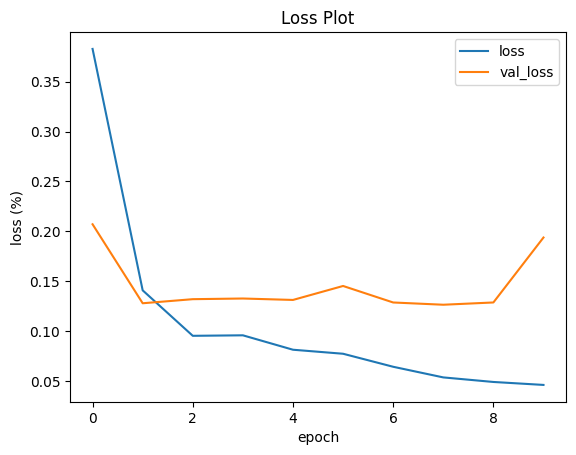

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Plot')
plt.xlabel('epoch')
plt.ylabel('loss (%)')
plt.legend()

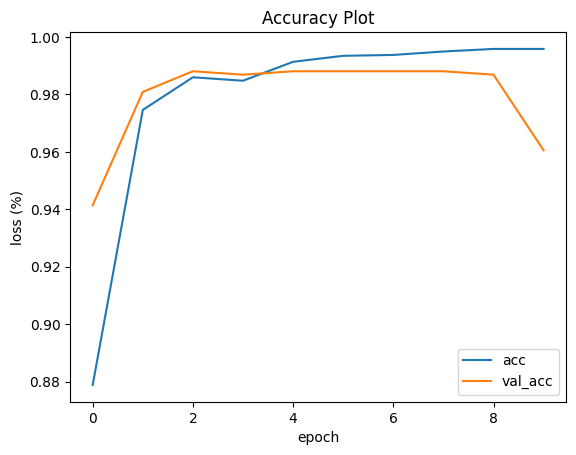

In [ ]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.title('Accuracy Plot')
plt.xlabel('epoch')
plt.ylabel('loss (%)')
plt.legend()

In [ ]:
def preprocessing(X):
  x = X.apply(lambda x: remove_stopwords(x))
  x = token.texts_to_sequences(x)
  return sequence.pad_sequences(x, maxlen=MAXLEN)

In [ ]:
# preprocess on test data before evaluating model
test_eval = model.evaluate(preprocessing(test['message']), test['type'])

44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - acc: 0.9751 - loss: 0.1307


don't touch after this except to create function

In [ ]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  pred = model.predict(preprocessing(pd.Series([pred_text])))[0]

  return (pred[0], ("ham" if pred < 0.5 else "spam")) # spam:1, ham:0

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
(0.0, 'ham')


In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
You passed the challenge. Great job!
